In [63]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

csv_path = os.path.join('..', 'data', 'train_v9rqX0R.csv')
data = pd.read_csv(csv_path)

In [ ]:
# Data summary
data.head(2)
print("Total data samples:", len(data)) # 8523


# Item_Identifier           | Categorical | Alphanumeric | split text 1559->89 | X | ✓ 
# Item_Weight               | Numerical   | Float        | NaN/Normalize       | X | 
# Item_Fat_Content          | Categorical | Text         | map 5 -> 2          | X | ✓
# Item_Visibility           | Numerical   | Float        | Normalize           | X | ✓
# Item_Type                 | Categorical | Text         | too many ?          | X | 
# Item_MRP                  | Numerical   | Float        | Normalize           | X |
# Outlet_Identifier         | Categorical | Alphanumeric | cant do much        | X | ✓
# Outlet_Establishment_Year | Numerical   | Integer      | Normalize           | X |
# Outlet_Size               | Categorical | Text         | NaN                 | X |
# Outlet_Location_Type      | Categorical | Numerical    | try numerical       | X | --
# Outlet_Type               | Categorical | Alphanumeric | try merging         | X | --
# Item_Outlet_Sales         | Numerical   | Float        | Normalize           | y |


Total data samples: 8523
0.0
0.06613202877895107
0.328390948


In [ ]:
#1 --------- Item_Identifier ---------
# Categorical Alphanumeric
# Total 1559 unique ids. Very high dimensional
print(f"Unique Item_Identifier:", len(pd.unique(data["Item_Identifier"])))
print(len(pd.unique(data["Item_Identifier"].str[0:2])))
print(len(pd.unique(data["Item_Identifier"].str[2:3])))
print(len(pd.unique(data["Item_Identifier"].str[3:])))
# Splitting will reduce the dimensions to 89

Unique Item_Identifier: 1559
3
26
60


In [74]:
#4 --------- Item_Fat_Content ---------         
# Categorical Text
print(f"Unique Item_Fat_Content:", pd.unique(data["Item_Fat_Content"]))
# Item_Fat_Content: only 2 categories. ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
# We can map it using some dict

Unique Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


0.0
0.06613202877895107
0.328390948
Fraction below 0.25: 0.99


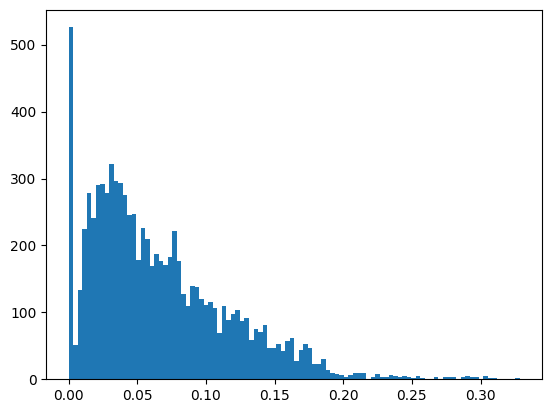

In [ ]:
#4 --------- Item_Visibility ---------         
# Numerical float positive value.
# Normalize it to range from 0 to 1 to match the scaling with other features.
print(np.min(data["Item_Visibility"])) # 0.0
print(np.mean(data["Item_Visibility"])) # 0.06613202877895107
print(np.max(data["Item_Visibility"])) # 0.328390948
plt.hist(data["Item_Visibility"], bins=100)
# histogram is mostly populated near zero. May be we can clip higher values to max 0.2
threshold = 0.2
fraction_below = (data["Item_Visibility"] < threshold).mean()
print(f"Fraction below {threshold}: {fraction_below:.2f}")


In [ ]:
# NaN handling
for col_name in data.columns: # NaN in Item_Weight and Outlet_Size
    if True in pd.unique((data[col_name].isna())):
        print(f"NaN in {col_name}")

In [ ]:
# Categoricals
for col_name in ["Item_Identifier", "Item_Fat_Content", "Item_Type",
                 "Outlet_Identifier","Outlet_Size", "Outlet_Location_Type","Outlet_Type"]:
    print(f"Unique {col_name}:", len(pd.unique(data[col_name])))
    # Too many in Item_Identifier. Can we split it and categorize ?
    # Item_Fat_Content: only 2 categories. ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
    # Item_Type Has 16. Can we merge some based on some logic ?
    # Outlet_Identifier . Has 10. Cant do much here.
    # Outlet_Size: Only 3 categories . ['Medium' nan 'High' 'Small']
    # Outlet_Location_Type. 3 categories. Try both Categ & numer ['Tier 1' 'Tier 3' 'Tier 2']
    # Outlet_Type 4 catogories. Can we merge some ? ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store' 'Supermarket Type3']
    

Unique Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
